In [21]:
import sys
from src import model, visualization, evaluate, data
import src.lib.useful_functions as uf


import numpy as np
import yaml
import os
import cv2 as cv
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Muy lento, buscar forma de optimizar
#Demora 35 seg para 100 imagenes, para 51219 se espera 5 hs aprox

#Load first img from folder

# fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
# img1_filename = sorted(os.listdir(fr_folder_path))[0]
# img1 = load_img(last_img_name=img1_filename)


# #Iterate from second img to last./,;'[//,/pl
# fieldnames = ['Img1', 'Img2', 'rmse']

# with open(   'outliers2.csv', 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     for filename in sorted(os.listdir(fr_folder_path))[1:]:
#         img2_filename = filename
#         img2 = load_img(last_img_name=img2_filename)
#         rmse = np.sqrt(np.mean((img1 - img2)**2))
        
#         row_dict = {}
#         row_dict['Img1'] = img1_filename
#         row_dict['Img2'] = img2_filename
#         row_dict['rmse'] = rmse

#         writer.writerow(row_dict)
        
#         img1 = img2
#         img1_filename = img2_filename
    

In [15]:
df_outliers = pd.read_csv("outliers.csv") 

82.01935
5.6994169447498715
Largo filtrado: 54


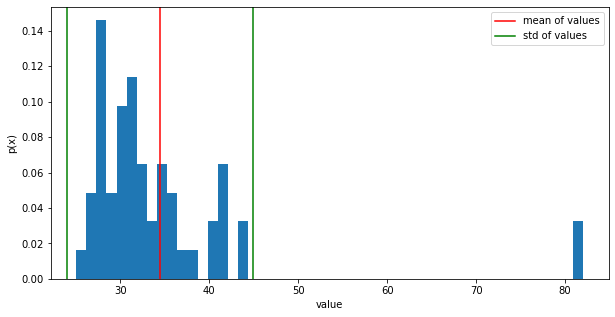

In [16]:
rmse = df_outliers.rmse.to_list()
print(np.max(rmse))
print(np.mean(rmse))
rmse = [n for n in rmse if (n >= 25)]
print('Largo filtrado:', len(rmse))

visualization.plot_histogram(rmse,bins=50)

In [131]:
print(len(df_outliers))
outliers_filename = []

for i in range(len(df_outliers)):
    if (df_outliers.values[i][2])>23:
        #outliers_filename.append(df_outliers.values[i][0])
        outliers_filename.append(df_outliers.values[i][1])
        
        

        
        #print(df_outliers.values[i])
        
print(len(outliers_filename))
# print(len(set(outliers_filename)))
# outliers_filename = list(set(outliers_filename))

51218
66


66
ART_2020244_143020.FR


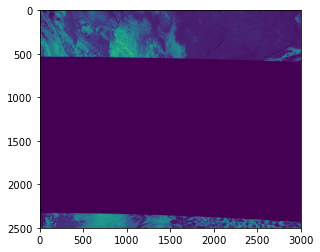

7.9617352


In [176]:
fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'

print(len(outliers_filename))

img_filename = outliers_filename[23]
#img_filename = 'ART_2020010_173021.FR'
print(img_filename)

img1 = data.load_img(meta_path=meta_path,
             img_name=img_filename,
             mk_folder_path=mk_folder_path,
             img_folder_path=fr_folder_path
    )

plt.imshow(img1)
plt.show()
print(np.mean(img1))